# COGS 108 - Final Project 

# Overview

For our project, we decided to compare how popular a show's specials were in terms of ratings and viewership to its regular episodes. We webscraped from IMDb and Wikipedia in order to gather our data and created visualizations to better understand the data prior to a more concise analysis. We found that overall, most shows’ specials are able to bring in a higher viewership but it is less likely that they will receive a higher rating than regular episodes.

# Names

- Anh Tran
- Nawwar Tohme
- Kevin Lam
- Joey Hoang
- Jane Lin

# Research Question

Are TV show specials more popular based on viewership and ratings than regular episodes of television shows?

## Background and Prior Work

References (include links):
- 1)https://en.wikipedia.org/wiki/Television_special
- 2)https://books.google.com/books?id=SeoJAAAAQBAJ&pg=PA81&lpg=PA81&dq=are+specials+more+popular+than+regular+episodes&source=bl&ots=J6-GpYWASI&sig=ACfU3U0oSkugZ-SmNPdIrdQY2U4Mo6e1Sg&hl=en&sa=X&ved=2ahUKEwi_t4GlkcvpAhV2JzQIHckWB6YQ6AEwAHoECAkQAQ#v=onepage&q=are%20specials%20more%20popular%20than%20regular%20episodes&f=false
- 3)https://github.com/alberanid/imdbpy

A television show special is a separate work not included in the regular television programming that is aired either during or after the show’s run. The topics of specials can vary with some being seasonal specials with Thanksgiving or Christmas themes that airs during the show’s run and coincides with the current season, reunion episodes that occur after the show ends, or even interesting avenues that the show wanted to consider but did not fit as regular programming like *Family Guy*’s parody of *Star Wars*. Historically, stand-alone, one-time shows were more popular due to the expense of stable programming, as well as its fluctuating success. However, the trend reversed and networks provided audiences with routine content, avoiding specials in the hopes of preventing them from moving to other networks. Today, according to the authors of _Media Programming: Strategies and Practices_, hundreds of specials come out each year in the United States and have the potential to be incredibly prosperous and have high spikes in ratings, but the concerns in disrupting routine still remain. As a group, we enjoy watching many different shows that have specials and we would like to know whether this concern is unfounded, specifically if specials are actually more popular than regular programming. We were unable to find any prior work that addresses our question, but we were able to adapt similar ideas using the IMDb Python package developed by GitHub user alberanid. This question could be important for producers and writers of television shows to understand audiences and increase their show’s popularity. Additionally, this might be able to answer the question of whether or not specials are truly beneficial to networks and shows as historically its usage has been inconsistent.

# Hypothesis


Special episodes will have higher viewership and better ratings than the regular episodes of a show. This is most likely due to the nature of specials happening around holidays, such as Christmas and Thanksgiving, or that the specials could be reunions and garner more viewership due to the memorable topics.

# Dataset(s)

- Dataset Name: Spongebob Ratings
- Link to the dataset: https://www.imdb.com/title/tt0206512/episodes?ref_=tt_eps_sn_mr
- Number of observations: 266

This dataset contains the ratings of each Spongebob Squarepants episode out of 10 stars, taken from IMDb.
	
- Dataset Name: Spongebob Viewership
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_SpongeBob_SquarePants_episodes
- Number of observations: 266

This dataset contains the viewership of each Spongebob Squarepants episode.


- Dataset Name: Teen Titans Go! Ratings
- Link to the dataset: https://www.imdb.com/title/tt2771780/
- Number of observations: 280

This dataset contains the ratings of each Teen Titans Go! Episode out of 10 stars, taken from IMDb.

- Dataset Name: Teen Titans Go! Viewership
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_Teen_Titans_Go!_episodes
- Number of observations: 280

This dataset contains the viewership of each Teen Titans Go! episode.


- Dataset Name: Friends Ratings
- Link to the dataset: https://www.imdb.com/title/tt0108778/?ref_=ttep_ep_tt
- Number of observations: 236

This dataset contains the ratings of each Friends episode.

- Dataset Name: Friends Viewership
- Link to the dataset: http://newmusicandmore.tripod.com/friendsratings.html
- Number of observations: 236

This dataset contains the viewership of each Friends episode.


- Dataset Name : Grey’s Anatomy Ratings
- Link to the dataset: https://www.imdb.com/title/tt0413573/
- Number of observations: 364

This dataset contains the ratings for each episode of Grey’s Anatomy, out of 10 stars, from IMDb.	

- Dataset Name : Grey’s Anatomy Viewership
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_Grey%27s_Anatomy_episodes
- Number of observations: 364

This dataset contains the viewership of each episode of Grey's Anatomy. (Based on the US).


- Dataset Name: The Simpsons Ratings
- Link to the dataset: https://www.imdb.com/title/tt0096697/episodes?ref_=tt_eps_sn_mr
- Number of observations: 684

This dataset contains the ratings of the each episode of The Simpsons, out of 10 stars, taken from IMDb.

- Dataset Name: The Simpsons Viewership
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_The_Simpsons_episodes
- Number of observations: 684

This dataset contains the viewership of each episode of The Simpsons.


- Dataset Name: South Park Ratings
- Link to the dataset: https://www.imdb.com/title/tt0121955/episodes?ref_=tt_eps_sn_mr
- Number of observations: 307

This dataset contains the ratings of each episode of South Park, out of 10 stars, taken from IMDb.

- Dataset Name: South Park Viewership
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_South_Park_episodes
- Number of observations: 307

This dataset contains the viewership of each episode of South Park.


- Dataset Name: Wizards of Waverly Place Viewership
- Link to the dataset: https://en.wikipedia.org/wiki/List_of_Wizards_of_Waverly_Place_episodes
- Number of observations: 108

This dataset contains the viewership of each episode and special of Wizards of Waverly Place.

- Dataset Name: Wizards of Waverly Place Ratings
- Link to the dataset: https://www.imdb.com/title/tt0799922/episodes?ref_=tt_ov_epl
- Number of observations: 106

This dataset contains the ratings of each episode of Wizards of Waverly Place.

Corresponding datasets from Wikipedia and IMDb will make up one show. For example, Spongebob Ratings and Spongebob Viewership will create the overall dataset for Spongebob. In total, all of these sources will come together to become the ratings and viewership of seven different shows.

# Setup

In [1]:
import pandas as pd
import requests
import string
import datetime
import numpy as np
from imdb import IMDb
from pandas.io.html import read_html
from bs4 import BeautifulSoup

%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#IMDB search package
#pip install git+https://github.com/alberanid/imdbpy --user

# Data Cleaning

We scraped data from Wikipedia and IMDb into two separate datasets. One had the viewership and the date the episode was aired on television, and the other had the ratings. Both datasets included the title of the episode. For each show, we identified the specials and added a column to reflect if an episode was a special (True) or a regular episode (False). The datasets were made to be uniform by removing extra punctuation and unnecessary whitespace, and modifying the date format. The two datasets were then combined by episode title to create one whole dataset for each show and any episode with missing information was dropped. Any show with mismatched titles from the two dataframes were dropped, but we fixed the titles of special episodes manually.

This function converts a string month from our webscraping into integers that can be used in our next function to create datetime objects.

In [2]:
#Functions to convert to DateTime
def month_to_int(month):
    month = month.lower()
    if(month == 'january' or month == 'jan'):
        return 1
    elif(month == 'february' or month == 'feb'):
        return 2
    elif(month == 'march' or month == 'mar'):
        return 3
    elif(month == 'april' or month == 'apr'):
        return 4
    elif(month == 'may'):
        return 5
    elif(month == 'june' or month == 'jun'):
        return 6
    elif(month == 'july' or month == 'jul'):
        return 7
    elif(month == 'august' or month == 'aug'):
        return 8
    elif(month == 'september' or month == 'sept'):
        return 9
    elif(month == 'october' or month == 'oct'):
        return 10
    elif(month == 'november' or month == 'nov'):
        return 11
    elif(month == 'december' or month == 'dec'):
        return 12
    else:
        return np.nan

This function gives us our datetime objects to be used in our graphs by first transforming each date in the argument array to be as uniform as possible. Then it calls the month_to_int function we defined to transform the months into integers and finally appends them to a new array containing datetime objects.

In [3]:
def to_date_time(date_array):
    return_array = []
    item_array = []
    temp_string = ""
    for date in date_array:
        if(type(date) != float):
            temp_string = date.lower()
            temp_string = temp_string.replace(',', '')
            item_array = temp_string.split()
            item_array[0] = month_to_int(item_array[0])
            item_array[1] = int(item_array[1])
            item_array[2] = int(item_array[2])
            return_array.append(datetime.date(item_array[2], item_array[0], item_array[1]))
        else:
            return_array.append(np.nan)
            
    return return_array

Function to combine our views and rating dataframes for a show by merging them based on matching titles. In order to match them, we transformed each title from both dataframes to be as uniform as possible by stripping punctutation, capitalization, and whitespace.

In [4]:
def combine_db(views, ratings):
    #Merges the dataframes by matching the stripped titles
    views['Title'] = views['Title'].apply(str.lower)
    views['Title'] = views['Title'].str.replace('[^\w\s]','')
    views['Title'] = views['Title'].apply(str.strip)
    ratings['Title'] = ratings['Title'].apply(str.lower)
    ratings['Title'] = ratings['Title'].str.replace('[^\w\s]','')
    ratings['Title'] = ratings['Title'].apply(str.strip)
    combined = views.merge(ratings, on='Title')
    return combined

# *Spongebob* Views

In [5]:
sponge = requests.get('https://en.wikipedia.org/wiki/List_of_SpongeBob_SquarePants_episodes_(seasons_1%E2%80%9310)#Episodes')
sponge_more = requests.get('https://en.wikipedia.org/wiki/List_of_SpongeBob_SquarePants_episodes')

sponge_soup = BeautifulSoup(sponge.content, 'html.parser')
sponge_soup_more = BeautifulSoup(sponge_more.content, 'html.parser')

In [6]:
table = sponge_soup.find_all('tr', 'vevent')
table_more = sponge_soup_more.find_all('tr', 'vevent')

In [7]:
list_title, list_date, list_view = [], [], []
title_more, date_more, view_more = [], [], []
for row in table:
    
    cells = row.findAll('td')
    
    try:
        title = cells[1].find_all(text=True)
    except:
        title = np.nan
    
    if(not('-' in cells[5].find(text=True))):
        try:
            views = float(cells[5].find(text=True))
        except:
            views = np.nan
    else:
        try:
            views = float(cells[6].find(text=True))
        except:
            views = np.nan
    
    date = cells[4].find(text=True)
    if(len(title) > 1):
        list_title.append(title[1].replace('"', ''))
    else:
        list_title.append(title[0].replace('"', ''))
    list_date.append(date.replace('\xa0', ' '))
    list_view.append(views)
    
for rows in table_more:
    cells = rows.findAll('td')
    
    if(len(cells) <= 5):
        break
    try:
        title = cells[1].find_all(text=True)
    except:
        title = np.nan
    
    try:
        views = float(cells[5].find(text=True))
    except:
        views = np.nan
    
    date = cells[4].find(text=True)
    if(len(date) == 3):
        date = np.nan
    
    if(len(title) > 1):
        title_more.append(title[1].replace('"', ''))
    else:
        title_more.append(title[0].replace('"', ''))
    
    if(type(date) != float):
        date_more.append(date.replace('\xa0', ' '))
    else:
        date_more.append(np.nan)
    
    view_more.append(views)

In [8]:
list_title += title_more
list_date += date_more
list_view += view_more

In [9]:
list_date = to_date_time(list_date)

In [10]:
special_list = ['Chrismas Who?', 'Party Pooper Pants', 'Ugh', 'The Sponge Who Could Fly', 'Have You Seen This Snail?', 
                'Dunces and Dragons', 'Friend or Foe', 'Pest of the West', 'WhoBob WhatPants?', 
                'What Ever Happened to SpongeBob?', 'SpongeBob SquarePants vs. The Big One', 'The Clash of Triton',
                'SpongeBob\'s Last Stand', 'The Great Patty Caper', 'Frozen Face-Off', 'A SquarePants Family Vacation',
                'Ghoul Fools', 'It\'s a SpongeBob Christmas!', 'Hello Bikini Bottom!', 'It Came from Goo Lagoon',
                'SpongeBob, You\'re Fired', 'Goodbye, Krabby Patty?', 'The Legend of Boo-Kini Bottom', 
                'SpaceBob MerryPants', 'Escape from Glove World']

sponge_df = pd.DataFrame(zip(list_title, list_date, list_view), columns=['Title', 'Date', 'Views (millions)'])

sponge_df['Special'] = sponge_df['Title'].apply(lambda x: True if x in special_list else False)

# *Spongebob* Ratings

In [11]:
i = IMDb()
#Replace the argument with the numbers after tt from IMDB URL
series = i.get_movie('0206512')
i.update(series, 'episodes')
seasons = sorted(series['episodes'].keys())

In [12]:
list_rating, list_title, list_date = [], [], []
for i in range(1, len(seasons)):
    current_season = series['episodes'][i]
    num_of_eps = len(current_season) + 1
    for j in range(1, num_of_eps):
        #imdb miscounts ep nums
        if(i == 6 and j == 24) or i == 6 and j == 25:
            j += 1
        current_ep = series['episodes'][i][j]
        try:
            if (current_ep['votes'] >= 100):
                list_rating.append(current_ep.data['rating'])
            else:
                list_rating.append(np.nan)
        except:
            break
        
        list_date.append(current_ep['original air date'])
            
        list_title.append(current_ep['title'])

In [13]:
index = 0
new_list_date = []
new_list_rating = []
titles = []
new_list_title = []

for entry in list_title:
    titles = entry.split('/')
    for title in titles:
        new_list_title.append(title);
        new_list_date.append(list_date[index])
        new_list_rating.append(list_rating[index])
    index += 1

sponge_ratings = pd.DataFrame(list(zip(new_list_title, new_list_rating)), columns = ['Title', 'Rating'])

In [14]:
sponge_combined = combine_db(sponge_df, sponge_ratings)

# *South Park* Views

In [15]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_South_Park_episodes')
soup = BeautifulSoup(page.content, 'html.parser')

In [16]:
table = soup.find_all('tr', 'vevent')

In [17]:
list_title, list_date, list_view, list_specials = [], [], [], []

for row in table:
   
    cells = row.findAll('td')
    #only check relevant tables with data we want
    if len(cells) >= 6:
        
        try:
            title = cells[1].find('a').text
        except:
            title = np.nan
    
        try:
            #missing U.S. viewership column condition
            if len(cells) < 7:
                views = np.nan
            else:
                views = float(cells[6].find(text=True))
        except:
            views = np.nan
        
        try:
            date = cells[4].find(text=True)
        except:
            date = np.nan
        
        title = title.replace('"', '')
        #special episodes added to list of specials
        if 'Special' in title:
            list_specials.append(title.replace('\xa0', ''))
        list_title.append(title.replace('\xa0', ''))
        
        list_date.append(date.replace('\xa0', ' '))
        
        list_view.append(views)

In [18]:
list_date = to_date_time(list_date)

In [19]:
park_df = pd.DataFrame(zip(list_title, list_date, list_view), columns=['Title', 'Date', 'Views (millions)'])
park_df['Special'] = park_df['Title'].apply(lambda x: True if x in list_specials else False)

# *South Park* Ratings

In [20]:
i = IMDb()
#Replace the argument with the numbers after tt from IMDB URL
series = i.get_movie('0121955')
i.update(series, 'episodes')
seasons = sorted(series['episodes'].keys())

In [21]:
list_rating, list_title, list_date = [], [], []
for i in range(1, len(seasons)):
    current_season = series['episodes'][i]
    num_of_eps = len(current_season) + 1
    #NOTE: season 1 has an unaired episode so for just season 1 I lowered the number of episodes
    if i == 1:
        num_of_eps-=1
    for j in range(1, num_of_eps):
        current_ep = series['episodes'][i][j]
        #only adds the rating for at least 100 ratings per episode
        if(current_ep['votes']):
            if (current_ep['votes'] >= 100):
                list_rating.append(current_ep.data['rating'])
            else:
                list_rating.append(np.nan)
        else:
            list_rating.append(np.nan)
        list_date.append(current_ep['original air date'])
        list_title.append(current_ep['title'])

In [22]:
park_rating = pd.DataFrame(list(zip(list_title, list_rating)), columns = ['Title','Rating'])

In [23]:
park_combined = combine_db(park_df, park_rating)

# *Friends* Views

In [24]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_Friends_episodes')
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('tr', 'vevent')

In [25]:
list_title, list_date, list_view, list_special = [], [], [], []

for row in table:
    
    cells = row.findAll('td')
    if (len(cells) == 3):
        try:
            title = cells[0].find_all(text=True)
        except:
            title = np.nan
        try:
            views = float(cells[2].find(text=True))
        except:
            views = np.nan

        date = cells[1].find(text=True)
        if(len(title) > 1):
            list_title.append(title[1].replace('"', ''))
        else:
            list_title.append(title[0].replace('"', ''))
        list_date.append(date.replace('\xa0', ' ').replace(',', ''))
        list_view.append(views)
        list_special.append(True)

    else:
        try:
            title = cells[1].find_all(text=True)
        except:
            title = np.nan
        try:
            views = float(cells[6].find(text=True))
        except:
            views = np.nan

        if(len(title) > 1):
            list_title.append(title[1].replace('"', ''))
        else:
            list_title.append(title[0].replace('"', ''))
        date = cells[4].find(text=True)
        list_date.append(date.replace('\xa0', ' ').replace(',', ''))
        list_view.append(views)
        list_special.append(False)

In [26]:
list_date = to_date_time(list_date)
df_friends_views = pd.DataFrame(list(zip(list_title,list_date,list_view,list_special)), columns = ['Title', 'Date', 'Views (millions)', 'Special'])

In [27]:
df_friends_views.loc[df_friends_views['Title'] == 'Friends', 'Title']= 'Friends: The Stuff You\'ve Never Seen'

# *Friends* Ratings

In [28]:
i = IMDb()
#Friends regular episodes
series = i.get_movie('0108778')
i.update(series, 'episodes')
seasons = sorted(series['episodes'].keys())

In [29]:
i = IMDb()
#Friends: The One Before The Last One
special = i.get_movie('0583508')
special_title = str(special)
special_rating = float(special['rating'])

In [30]:
i = IMDb()
#Friends: The Stuff You've Never Seen
special_1 = i.get_movie('0292518')
special_title_1 = str(special_1)
special_rating_1 = float(special_1['rating'])

In [31]:
list_rating, list_title, list_date = [], [], []
for i in range(1, len(seasons) + 1):
    current_season = series['episodes'][i]
    num_of_eps = len(current_season) + 1
    for j in range(1, num_of_eps):
        current_ep = series['episodes'][i][j]
        #only adds the rating for at least 100 ratings per episode
        if (current_ep['votes'] >= 100):
            list_rating.append(current_ep.data['rating'])
        else:
            list_rating.append(np.nan)
        list_title.append(current_ep['title'])
        list_date.append(current_ep['original air date'])

In [32]:
friends_ratings = pd.DataFrame(list(zip(list_title, list_rating)), columns = ['Title', 'Rating'])

In [33]:
friends_combine = combine_db(df_friends_views, friends_ratings)

In [34]:
friends_combine.loc[217] = [special_title, df_friends_views['Date'][228], df_friends_views['Views (millions)'][228], True, special_rating]
friends_combine.loc[216] = [special_title_1, df_friends_views['Date'][164], df_friends_views['Views (millions)'][164], True, special_rating_1]

# *Wizards of Waverly Place* views

In [35]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_Wizards_of_Waverly_Place_episodes')
soup = BeautifulSoup(page.content, 'html.parser')

In [36]:
table = soup.find_all('tr', 'vevent')

In [37]:
list_title, list_date, list_view, list_sp_title = [], [], [], []

for row in table:
   
    cells = row.findAll('td')
     #only checks tables with 7 columns so it ignores the film and special for these lists
    if (len(cells)) == 7:
        
        try:
            title = cells[1].find_all(text=True)
        except:
            title = np.nan
    
        try:
            views = float(cells[6].find(text=True))
        except:
            views = np.nan
        
        try:
            date = cells[4].find(text=True)
        except:
            date = np.nan
        
        title[0] = title[0].replace('"', '')
        list_title.append(title[0].replace('\xa0', ''))
    
        list_date.append(date.replace('\xa0', ' '))
        
        list_view.append(views)
        
    #tables with special and film    
    elif (len(cells)) == 4:
        #for these tables the title column is classified as a header
        header = row.findAll('th')
        try:
            special_title = str(header[0].find_all(text=True))
            special_title = special_title[2:len(special_title) - 2]
        except:
            special_title = np.nan
          
        try:
            special_views = float(cells[3].find(text=True))
        except:
            special_views = np.nan
        
        try:
            special_date = cells[2].find(text=True)
        except:
            special_date = np.nan
        
        list_sp_title.append(special_title)
        list_title.append(special_title)
        list_view.append(special_views)
        list_date.append(special_date.replace('\xa0', ' '))

In [38]:
list_date = to_date_time(list_date)
wizards_df = pd.DataFrame(zip(list_title, list_date, list_view), columns=['Title', 'Date', 'Views (millions)'])
wizards_df['Special'] = wizards_df['Title'].apply(lambda x: True if x in list_sp_title else False)

# *Wizards of Waverly Place* Ratings

*Wizards of Waverly Place*'s specials were not included in the episode listing from IMDb, so each special had to be scraped from its own URL.

In [39]:
i = IMDb()
#Replace the argument with the numbers after tt
series = i.get_movie('0799922')
i.update(series, 'episodes')
seasons = sorted(series['episodes'].keys())

In [40]:
#The Wizards Return: Alex vs Alex
special_1 = i.get_movie('2448374')
special_1_title = str(special_1)
special_1_rating = float(special_1['rating'])
special_1_date = special_1['original air date']

In [41]:
#Wizards of Waverly Place: The Movie
movie = i.get_movie('1369845')
movie_title = str(movie)
movie_rating = float(movie['rating'])
movie_date = movie['original air date']

In [42]:
list_rating, list_title, list_date = [], [], []
for i in range(1, len(seasons) + 1):
    current_season = series['episodes'][i]
    num_of_eps = len(current_season) + 1
    for j in range(1, num_of_eps):
        current_ep = series['episodes'][i][j]
        #only adds the rating for at least 100 ratings per episode
        if (current_ep['votes'] >= 100):
            list_rating.append(current_ep.data['rating'])
        else:
            list_rating.append(np.nan)
        list_date.append(current_ep['original air date'])
        list_title.append(current_ep['title'])

In [43]:
wizards_rating = pd.DataFrame(list(zip(list_title, list_rating)), columns = ['Title', 'Rating'])
wizards_rating.loc[106] = [special_1_title, special_1_rating]
wizards_rating.loc[51] = [movie_title, movie_rating]

In [44]:
wizard_combined = combine_db(wizards_df, wizards_rating)

# *Grey's Anatomy* Views

In [45]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_Grey%27s_Anatomy_episodes')
soup = BeautifulSoup(page.content, 'html.parser')

In [46]:
table = soup.find_all('tr', 'vevent')

In [47]:
list_title, list_date, list_view, list_special = [], [], [], []

for row in table:
    
    cells = row.findAll('td')
    if (len(cells) == 4): continue
    if (len(cells) == 5):
        try:
            title = cells[0].find_all(text=True)
        except:
            title = np.nan
        try:
            views = float(cells[4].find(text=True))
        except:
            views = np.nan

        date = cells[3].find(text=True)
        if(len(title) > 1):
            list_title.append(title[0].replace('"', ''))
        list_date.append(date.replace('\xa0', ' ').replace(',', ''))
        list_view.append(views)
        list_special.append(True)
    else:
        try:
            title = cells[1].find_all(text=True)
        except:
            title = np.nan
        try:
            views = float(cells[6].find(text=True))
        except:
            views = float(cells[5].find(text=True))

        if(len(title) > 1):
            list_title.append(title[1].replace('"', ''))
        else:
            list_title.append(title[0].replace('"', ''))
        date = cells[4].find(text=True)
        list_date.append(date.replace('\xa0', ' ').replace(',', ''))
        list_view.append(views)
        list_special.append(False)

In [48]:
list_date = to_date_time(list_date)
greys_df = pd.DataFrame(list(zip(list_title,list_date,list_view,list_special)), columns = ['Title', 'Date', 'Views (millions)', 'Special'])

# *Grey's Anatomy* Ratings

*Grey's Anatomy*'s specials were not included in the episode listing from IMDb, so each special had to be scraped from its own URL.

In [49]:
i = IMDb()
#Replace the argument with the numbers after tt
series = i.get_movie('0413573')
i.update(series, 'episodes')
seasons = sorted(series['episodes'].keys())

In [50]:
#Grey's Anatomy Ratings each have their own IMDB page
i = IMDb()
#Replace the argument with the numbers after tt
special = i.get_movie('0849954')
special_title_1 = special['title']
special_rating_1 = special['rating']
special = i.get_movie('0795815')
special_title_2 = special['title']
special_rating_2 = special['rating']
special = i.get_movie('1073826')
special_title_3 = special['title']
special_rating_3 = special['rating']
special = i.get_movie('1009625')
special_title_4 = special['title']
special_rating_4 = special['rating']
special = i.get_movie('3545426')
special_title_5 = special['title']
special_rating_5 = special['rating']

In [51]:
list_rating, list_title, list_date = [], [], []
for i in range(1, len(seasons)):
    current_season = series['episodes'][i]
    num_of_eps = len(current_season) + 1
    for j in range(1, num_of_eps):
        current_ep = series['episodes'][i][j]
        #only adds the rating for at least 100 ratings per episode
        if (current_ep['votes'] >= 100):
            list_rating.append(current_ep.data['rating'])
        else:
            list_rating.append(np.nan)
        list_title.append(current_ep['title'])
        list_date.append(current_ep['original air date'])

Removing the 'Greys Anatomy:' from the title to match in the combined dataframe

In [52]:
list_title.append(special_title_1[15:])
list_rating.append(special_rating_1)
list_title.append(special_title_2[15:])
list_rating.append(special_rating_2)
list_title.append(special_title_3[15:])
list_rating.append(special_rating_3)
list_title.append(special_title_4[15:])
list_rating.append(special_rating_4)
list_title.append(special_title_5[15:])
list_rating.append(special_rating_5)
greys_ratings = pd.DataFrame(list(zip(list_title, list_rating)), columns = ['Title', 'Rating'])

In [53]:
greys_combine = combine_db(greys_df, greys_ratings)

# *Teen Titans GO* Views

In [54]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_Teen_Titans_Go!_episodes')
soup = BeautifulSoup(page.content, 'html.parser')

In [55]:
table = soup.find_all('tr', class_='vevent')

In [56]:
list_title, list_date, list_views = [], [], []

for row in table:
    
    cells = row.findAll('td')
    
    try:
        title = cells[1].find_all(text=True)
    except:
        title = np.nan
    if title[0] == 'Story by':
        break
    else:
        list_title.append(title[0].replace('"', ''))
        
    try:
        views = float(cells[5].find(text=True))
    except:
        views = np.nan
    list_views.append(views)
    
    try:
        date = cells[4].find(text=True)
    except:
        date = np.nan
    list_date.append(date.replace('\xa0', ' '))

In [57]:
list_date = to_date_time(list_date)
titan_specials = ['Island Adventures: Coconut Cream Pie', 'Island Adventures: Pure Protein', 
                'Island Adventures: Open Door Policy', 'Island Adventures: Crazy Desire Island', 
                'Island Adventures: The Titans Show',
                'The Day the Night Stopped Beginning to Shine and Became Dark Even Though It Was the Day Chapter One: I Saw You Dance', 
                'The Day the Night Stopped Beginning to Shine and Became Dark Even Though It Was the Day Chapter Two: The Story in Your Eyes', 
                'The Day the Night Stopped Beginning to Shine and Became Dark Even Though It Was the Day Chapter Three: Playing Hard to Get', 
                'The Day the Night Stopped Beginning to Shine and Became Dark Even Though It Was the Day Chapter Four: The Night Begins to Shine',
                'The Self-Indulgent 200th Episode Spectacular!', "How's This For a Special? Spaaaace", 
                'Forest Pirates', 'The Bergerac', 'Snot and Tears', 'Campfire!', 'What We Learned at Camp',
                "That's What's Up!", 'Crab Shenanigans', 'Brobots', 'Brain Flip']
titans_df = pd.DataFrame(zip(list_title, list_date, list_views), columns=['Title', 'Date', 'Views (millions)'])
titans_df['Special'] = titans_df['Title'].apply(lambda x: True if x in titan_specials else False)

We manually changed the titles from our Wikipedia webscrape to match the titles in IMDB.

In [58]:
titans_df.loc[142, 'Title'] = 'Coconut Cream Pie'
titans_df.loc[143, 'Title'] = 'Pure Protein'
titans_df.loc[144, 'Title'] = 'Open Door Policy'
titans_df.loc[145, 'Title'] = 'Crazy Desire Island'
titans_df.loc[146, 'Title'] = 'The Titans Show'

# *Teen Titans GO* Ratings

In [59]:
i = IMDb()
#Replace the argument with the numbers after tt
series = i.get_movie('2771780')
i.update(series, 'episodes')
seasons = sorted(series['episodes'].keys())

In [60]:
list_rating, list_title, list_date = [], [], []
for i in range(1, len(seasons)):
    current_season = series['episodes'][i]
    num_of_eps = len(current_season) + 1
    for j in range(1, num_of_eps):
        #IMDB missing season 6 episodes 17 - 26
        if (i == 6 and j >= 17):
            j += 10
        current_ep = series['episodes'][i][j]
        #Teen Titans GO has less than 100 ratings for multiple episodes
        list_rating.append(current_ep.data['rating'])
        list_title.append(current_ep['title'])
        list_date.append(current_ep['original air date'])

In [61]:
titans_ratings = pd.DataFrame(list(zip(list_title, list_rating)), columns = ['Title','Rating'])

In [62]:
titans_combine = combine_db(titans_df, titans_ratings)

# *The Simpsons* Views Seasons 1 - 20

In [63]:
page = 'https://en.wikipedia.org/wiki/List_of_The_Simpsons_episodes_(seasons_1%E2%80%9320)#Season_1_(1989%E2%80%9390)'
wikitables = read_html(page, attrs={"class":"wikitable plainrowheaders wikiepisodetable"})

In [64]:
df0 = pd.DataFrame(wikitables[0].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df1 = pd.DataFrame(wikitables[1].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df2 = pd.DataFrame(wikitables[2].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df3 = pd.DataFrame(wikitables[3].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df4 = pd.DataFrame(wikitables[4].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df5 = pd.DataFrame(wikitables[5].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df6 = pd.DataFrame(wikitables[6].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df7 = pd.DataFrame(wikitables[7].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df8 = pd.DataFrame(wikitables[8].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df9 = pd.DataFrame(wikitables[9].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df10 = pd.DataFrame(wikitables[10].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df11 = pd.DataFrame(wikitables[11].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df12 = pd.DataFrame(wikitables[12].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df13 = pd.DataFrame(wikitables[13].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df14 = pd.DataFrame(wikitables[14].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df15 = pd.DataFrame(wikitables[15].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df16 = pd.DataFrame(wikitables[16].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df17 = pd.DataFrame(wikitables[17].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df19 = pd.DataFrame(wikitables[19].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))
df20 = pd.DataFrame(wikitables[20].drop(['No.overall', 'No. inseason', 'Directed by', 'Written by', 'Prod.code'], axis=1))

In [65]:
def fix_views(var):
    var = var.split('[', 1)[0]
    return (float(var))

In [66]:
df0.rename(columns={'Original air date':'Date'}, inplace=True)
df0.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df1.rename(columns={'Original air date':'Date'}, inplace=True)
df1.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df2.rename(columns={'Original air date':'Date'}, inplace=True)
df2.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df3.rename(columns={'Original air date':'Date'}, inplace=True)
df3.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df4.rename(columns={'Original air date':'Date'}, inplace=True)
df4.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df5.rename(columns={'Original air date':'Date'}, inplace=True)
df5.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df6.rename(columns={'Original air date':'Date'}, inplace=True)
df6.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df7.rename(columns={'Original air date':'Date'}, inplace=True)
df7.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df8.rename(columns={'Original air date':'Date'}, inplace=True)
df8.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df9.rename(columns={'Original air date':'Date'}, inplace=True)
df9.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df10.rename(columns={'Original air date':'Date'}, inplace=True)
df10.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df11.rename(columns={'Original air date':'Date'}, inplace=True)
df11.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df12.rename(columns={'Original air date':'Date'}, inplace=True)
df12.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df13.rename(columns={'Original air date':'Date'}, inplace=True)
df13.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df14.rename(columns={'Original air date':'Date'}, inplace=True)
df14.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df15.rename(columns={'Original air date':'Date'}, inplace=True)
df15.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df16.rename(columns={'Original air date':'Date'}, inplace=True)
df16.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df17.rename(columns={'Original air date':'Date'}, inplace=True)
df17.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df19.rename(columns={'Original air date':'Date'}, inplace=True)
df19.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)
df20.rename(columns={'Original air date':'Date'}, inplace=True)
df20.rename(columns={'U.S. viewers(millions)':'Views (millions)'}, inplace=True)

In [67]:
frames = [df0,df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df19, df20]
simps_views = pd.concat(frames)
#simps_views = simps_views.set_index(['Date'])
#slices out the hyperlink
for i in range(0, len(simps_views)):
    view = simps_views.iloc[i, 2]
    if (type(view) == str):
        index_to_remove = view.find('[')
        if (index_to_remove != -1):
            simps_views.iloc[i, 2] = str(view[:index_to_remove])
list_date = simps_views['Date'].to_list()
list_date[len(list_date) - 8] = 'March 22, 2009'
list_date = to_date_time(list_date)
simps_views['Date'] = list_date

# *The Simpsons* Seasons 21-30 views

In [68]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_The_Simpsons_episodes#Episodes')
soup = BeautifulSoup(page.content, 'html.parser')

In [69]:
table = soup.find_all('tr', 'vevent')

In [70]:
list_title, list_date, list_view, list_sp_title = [], [], [], []

for row in table:
   
    cells = row.findAll('td')
     #only checks tables with 7 columns so it ignores the film and special for these lists
    if (len(cells)) == 7:
        
        try:
            title = cells[1].find('a').text
        except:
            title = np.nan
    
        try:
            views = float(cells[6].find(text=True))
        except:
            views = np.nan
        
        try:
            date = cells[4].find(text=True)
        except:
            date = np.nan
        
        list_title.append(title.replace('\xa0', ''))
        list_date.append(date.replace('\xa0', ' '))
        list_view.append(views)

In [71]:
#List of Simpsons Specials
list_sp_title = ['The Simpsons 20th Anniversary Special – In 3-D! On Ice!', 'The Simpsons: Access All Areas', 'The Simpsons: Mischief & Mayhem',
 'The Simpsons: Celebrity Friends','The Simpsons SU2C PSA','Late Show Top Ten List', "FOX's 25th Anniversary Special",
 'The Longest Daycare','Homer Votes 2012', 'Debate Reaction','A Message from Springfield Republican Party Headquarters',
 'Mr. Burns Endorses Romney','Fiscal Cliff', 'Maggie Sucks','Oscar-Nominated','Homer Shake','A Day in the Life...with Yeardley Smith',
 'Super Bowl Promo', 'Simpsons Ice Bucket Challenge', "Willie's Views On Scottish Independence",'The Simpsons Take the Bowl',
 'The Simpsons Guy','Pixel Couch Gag Submission', "Marge Simpson's ALS Ice Bucket Challenge",'Join The Simpsons At The Daytona 500',
 'Pokémon Now?', 'Homer From The Green Room At San Diego Comic-Con 2016','Homer Simpson vs. Sydney Opera House',
 'Jimmy Kimmel Live!','Homer Votes 2016', 'Happy Daytona Day', 'Moe Live Tweets!','A Public Announcement About the Eclipse',
 'Springfield of Dreams: The Legend of Homer Simpson', 'A Message from Moe About Puerto Rico','MLB on Fox Postseason',
 'Welcome to the Family, The Simpsons!', 'Everybody Smile', 'Playdate with Destiny', 'Donald Trump shorts', 'Trumptastic Voyage',
 'The Debateful Eight', '3 a.m.', "Donald Trump's First 100 Days In Office", '125 Days: Donald Trump Makes One Last Try To Patch Things Up With Comey',
 'Mueller Meets Trump', 'A Tale of Two Trumps','West Wing Story','125 Days: Donald Trump Makes One Last Try to Patch Things Up with Comey',
 '24 Minutes','At Long Last Leave','Brick Like Me',"Dancin' Homer", "Donald Trump's First 100 Days in Office",'The Fight Before Christmas',
 'Maggie in Peril: Chapter One', 'Maggie in Peril: The Thrilling Conclusion', 'The Serfsons', 'The Simpsons 138th Episode Spectacular',
 'File:Simpsons ALS Ice Bucket Challenge THE SIMPSONS ANIMATION on FOX',"Simpsons Roasting on an Open Fire",
 'Springfield Of Dreams: The Legend Of Homer Simpson',"Springfield's Most Wanted", 'The Great Phatsby',
 "The Simpsons' Christmas Message",'The Wreck of the Relationship','The Town',
 "File:Willie's Views On Scottish Independence THE SIMPSONS ANIMATION on FOX"]

In [72]:
list_date = to_date_time(list_date)
simps_views_2 = pd.DataFrame(zip(list_title, list_date, list_view), columns=['Title', 'Date', 'Views (millions)'])
#combining the 2 simpsons views dataframes
simps_views = pd.concat([simps_views, simps_views_2], axis=0)
simps_views['Special'] = simps_views['Title'].apply(lambda x: True if x in list_sp_title else False)

# *The Simpsons* Ratings

In [73]:
i = IMDb()
#https://www.imdb.com/title/tt0096697/
#Replace the argument with the numbers after tt
series = i.get_movie('0096697')
i.update(series, 'episodes')
seasons = sorted(series['episodes'].keys())

list_rating, list_title, list_date = [], [], []
for i in range(1, len(seasons)):
    current_season = series['episodes'][i]
    num_of_eps = len(current_season) + 1
    for j in range(1, num_of_eps):
        current_ep = series['episodes'][i][j]
        #only adds the rating for at least 100 ratings per episode
        if (current_ep['votes'] >= 100):
            list_rating.append(current_ep.data['rating'])
        else:
            list_rating.append(np.nan)
        list_title.append(current_ep['title'])
        list_date.append(current_ep['original air date'])

In [75]:
simps_ratings = pd.DataFrame(list(zip(list_title,list_rating)), columns = ['Title', 'Rating'])

In [76]:
simps_combined = combine_db(simps_views, simps_ratings)
simps_combined['Views (millions)'] = simps_combined['Views (millions)'].apply(lambda x: float(x))

# Data Analysis & Results

## EDA

In [96]:
#Increased the font size for readability
plt.rcParams.update({'font.size': 22})

### *Spongebob* Views
**NOTE**: After dropping all NaN values, the episodes between 2001 and 2004 were not included in our analysis. Thus the stagnant line spanning those years is not significant. 

The visualization below shows that generally, the 15 specials have a higher viewership count than the episodes aired around the same time. This agrees with our hypothesis that specials receive more views than regular episodes. It also shows that overtime, *Spongebob*'s viewership has declined overall for all episodes.

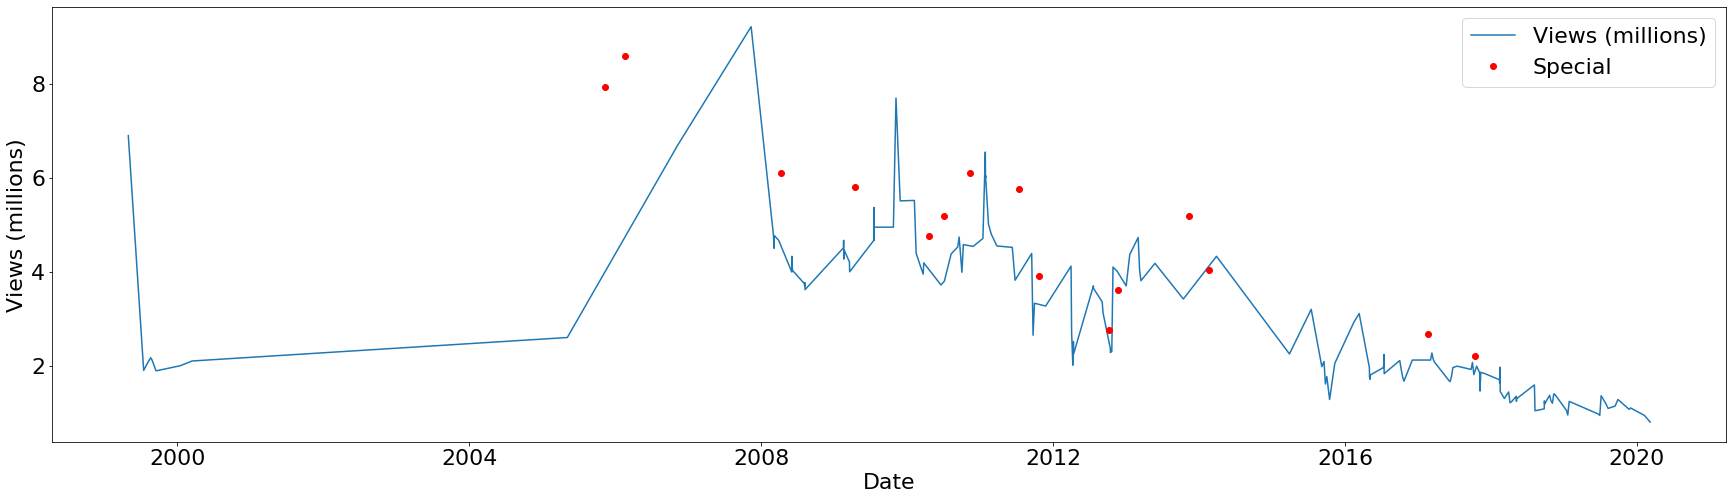

In [78]:
sponge_combined = sponge_combined.dropna()
sponge_combined.reset_index(inplace=True, drop=True)
sponge_plot = sponge_combined.loc[sponge_combined['Special'] == False].plot.line(y='Views (millions)', x='Date', figsize=(30, 8))
sponge_plot.axes.set_xlim(auto=True)
sponge_plot.figure
list_date = sponge_combined.loc[sponge_combined['Special'] == True]['Date'].to_list()
list_views = sponge_combined.loc[sponge_combined['Special'] == True]['Views (millions)'].to_list()
special_label, = sponge_plot.plot(list_date, list_views, 'ro', label='Special')
sponge_plot.legend()
sponge_plot.set_ylabel('Views (millions)')
sponge_plot.axes.grid(False)

### *Spongebob* Ratings
**NOTE**: After dropping all NaN values, the episodes between 2001 and 2004 were not included in our analysis. Thus the stagnant line spanning those years is not significant.

This visualization shows the ratings of *Spongebob* have declined drastically during the midpoints of its runtime. 
Interestingly, the ratings for its 15 specials have remained somewhat consistent around the 7 stars ratings according to IMDb, and they generally have slightly higher ratings than other episodes. This agrees with our hypothesis of specials having higher ratings.

Text(0, 0.5, 'Rating')

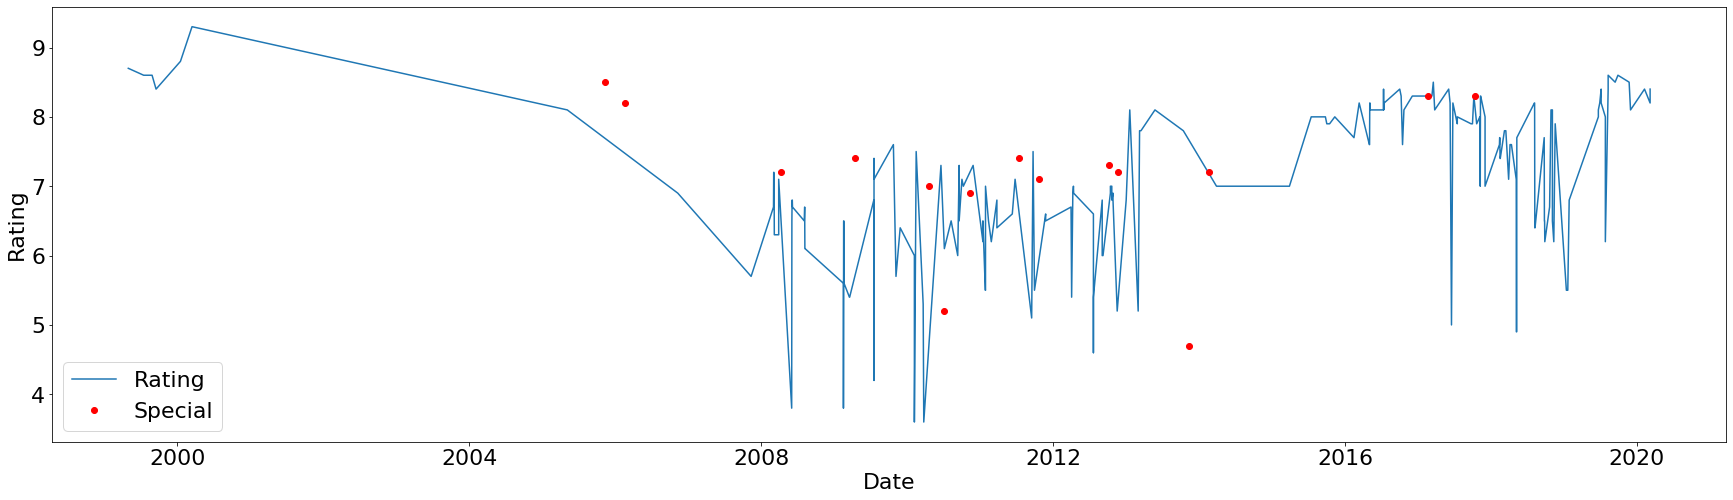

In [79]:
sponge_plot_ratings = sponge_combined.loc[sponge_combined['Special'] == False].plot.line(y='Rating', x='Date',figsize=(30, 8))
sponge_plot_ratings.axes.set_xlim(auto=True)
sponge_plot_ratings.figure
list_date = sponge_combined.loc[sponge_combined['Special'] == True]['Date'].to_list()
list_views = sponge_combined.loc[sponge_combined['Special'] == True]['Rating'].to_list()
special_label = sponge_plot_ratings.plot(list_date, list_views, 'ro', label='Special')
sponge_plot_ratings.legend()
sponge_plot_ratings.set_ylabel('Rating')

### *South Park* Views
**NOTE**: When dropping the NaN values from our data, the episodes between 1999-2006 were not included in our analysis. Thus, the linear decrease in viewership is not an actual representation of the view count for those years.

*South Park*'s viewership greatly declined after its initial success. The 3 specials did not have any significant change
in viewership compared to other episodes it was aired around. This disagrees with our hypothesis that specials would gain more viewership.

Text(0, 0.5, 'Views (millions)')

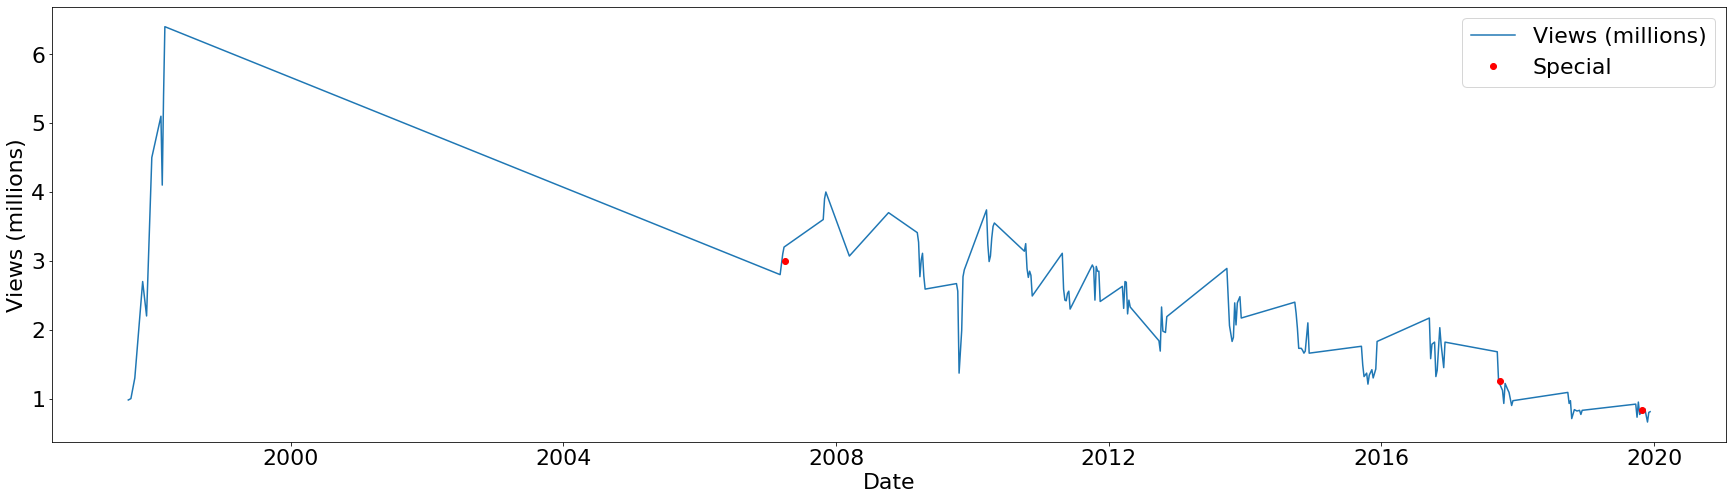

In [80]:
park_combined = park_combined.dropna()
park_combined.reset_index(inplace=True, drop=True)
park_plot = park_combined.loc[park_combined['Special'] == False].plot.line(y='Views (millions)', x='Date', figsize=(30, 8))
park_plot.axes.set_xlim(auto=True)
park_plot.figure
list_date = park_combined.loc[park_combined['Special'] == True]['Date'].to_list()
list_views = park_combined.loc[park_combined['Special'] == True]['Views (millions)'].to_list()
special_legend = park_plot.plot(list_date, list_views, 'ro', label='Special')
park_plot.legend()
park_plot.set_ylabel('Views (millions)')

### *South Park* Ratings
**NOTE**: When dropping the NaN values from our data, the episodes between 1999-2006 were not included in our analysis. Thus, the linear increase in ratings is not an actual representation of the ratings for those years.

*South Park* started off well, receiving average ratings around 8-9 out of 10. However, starting from the middle of its runtime the show had major issues staying consistently acclaimed. The 3 specials did no better than the regular episodes, disproving our hypothesis.

Text(0, 0.5, 'Rating')

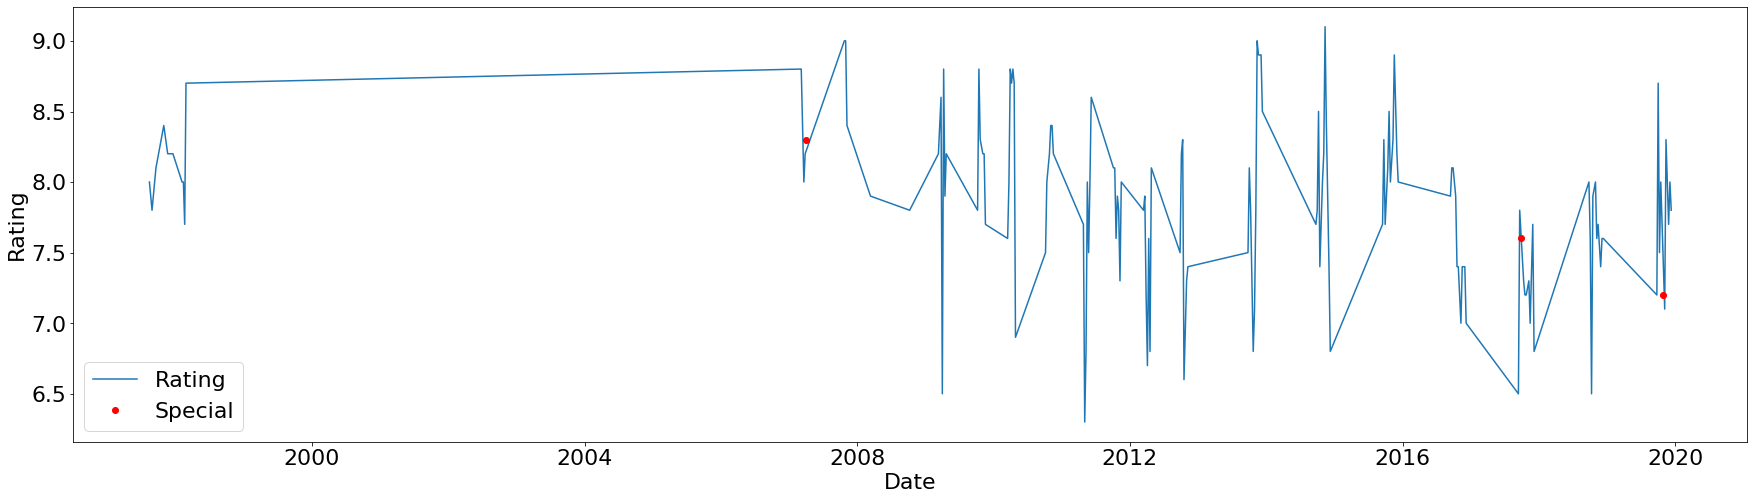

In [81]:
park_plot_ratings = park_combined.loc[park_combined['Special'] == False].plot.line(y='Rating', x='Date', figsize=(30, 8))
park_plot_ratings.axes.set_xlim(auto=True)
park_plot_ratings.figure
list_date = park_combined.loc[park_combined['Special'] == True]['Date'].to_list()
list_views = park_combined.loc[park_combined['Special'] == True]['Rating'].to_list()
special_legend = park_plot_ratings.plot(list_date, list_views, 'ro', label='Special')
park_plot_ratings.legend()
park_plot_ratings.set_ylabel('Rating')

### *Friends* Views
*Friends* had an astounding viewership of at least 15 million views per episode. The first special did not perform better than the other episodes, but the last special did much better. The spike at the end was the series finale, which aired on the same day as the last special, most likely attributing to the jump in viewership for the last special.

Text(0, 0.5, 'Views (millions)')

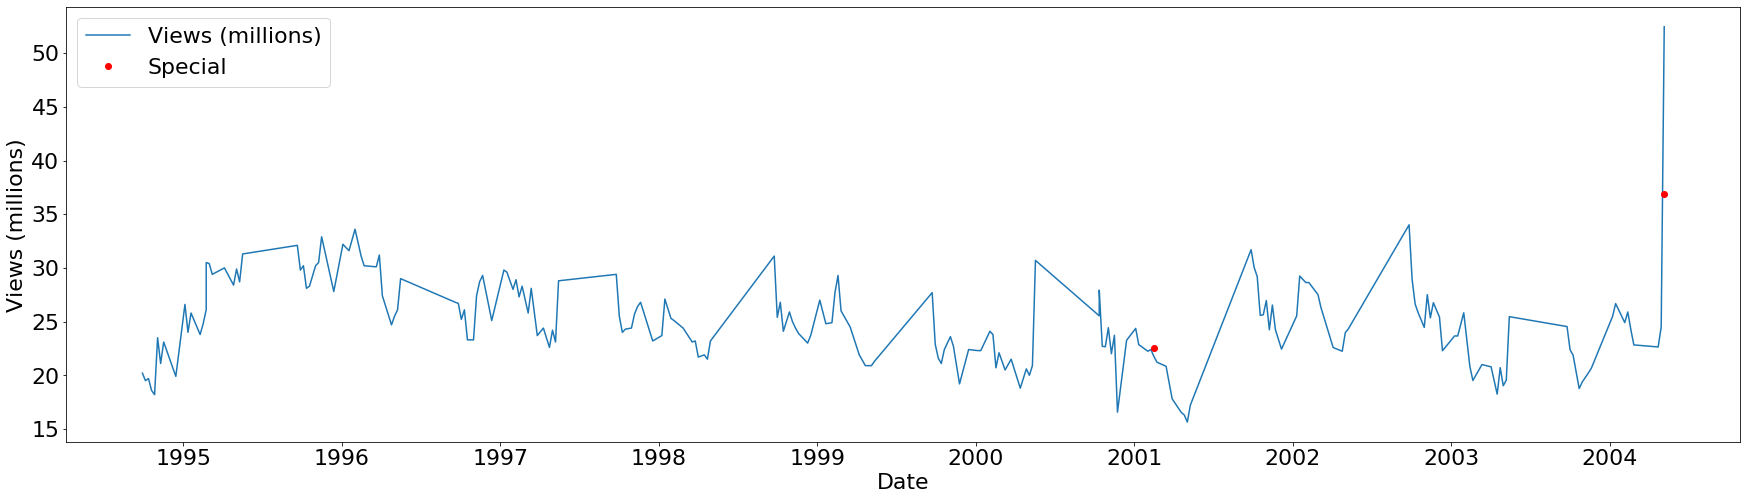

In [82]:
friends_combined = friends_combine.dropna()
friends_combined.reset_index(inplace=True, drop=True)
friends_plot = friends_combined.loc[friends_combined['Special'] == False].plot.line(y='Views (millions)', x='Date', figsize=(30, 8))
friends_plot.axes.set_xlim(auto=True)
friends_plot.figure
list_date = friends_combined.loc[friends_combined['Special'] == True]['Date'].to_list()
list_views = friends_combined.loc[friends_combined['Special'] == True]['Views (millions)'].to_list()
special_legend = friends_plot.plot(list_date, list_views, 'ro', label='Special')
friends_plot.legend()
friends_plot.set_ylabel('Views (millions)')

### *Friends* Ratings
*Friends* regularly had high ratings, but its specials performed poorly compared to other episodes aired around the same time. This disagrees with our hypothesis of specials having higher ratings. The last special was average in rating compared to the overall show, but compared to the series finale, it was rated worse.

Text(0, 0.5, 'Rating')

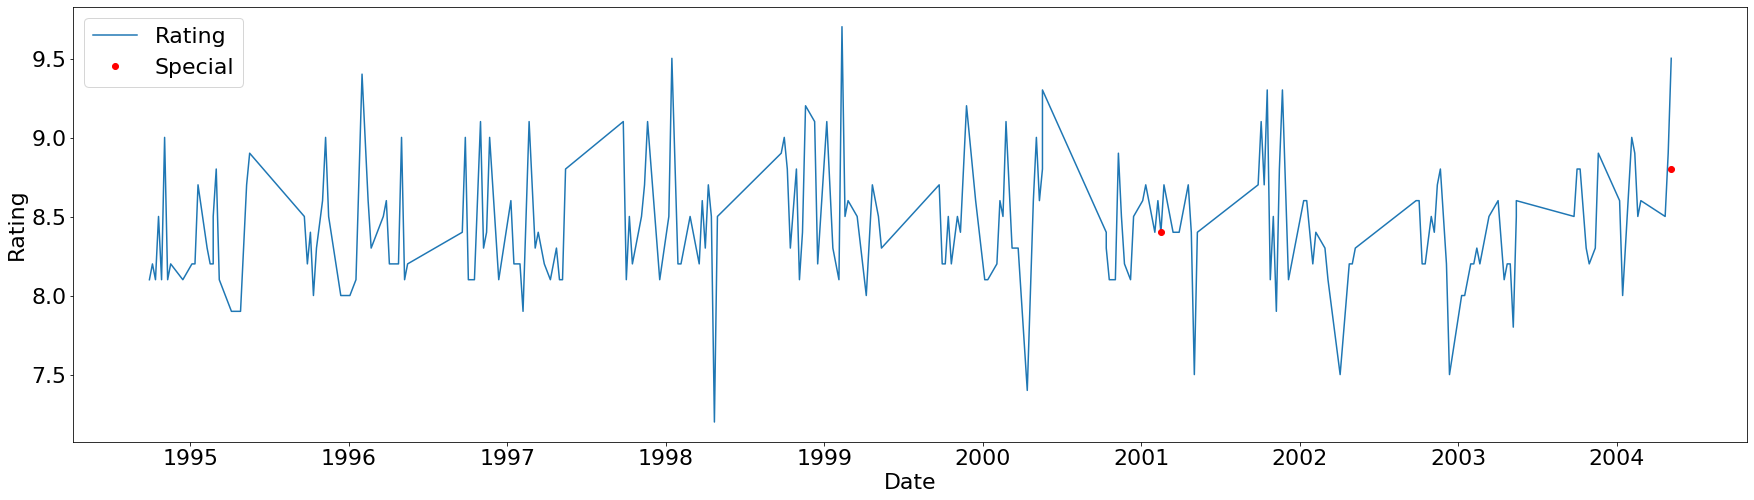

In [83]:
friends_plot_ratings = friends_combined.loc[friends_combined['Special'] == False].plot.line(y='Rating', x='Date', figsize=(30, 8))
friends_plot_ratings.axes.set_xlim(auto=True)
friends_plot_ratings.figure
list_date = friends_combined.loc[friends_combined['Special'] == True]['Date'].to_list()
list_views = friends_combined.loc[friends_combined['Special'] == True]['Rating'].to_list()
special_legend = friends_plot_ratings.plot(list_date, list_views, 'ro', label='Special')
friends_plot_ratings.legend()
friends_plot_ratings.set_ylabel('Rating')

### *Wizards of Waverly Place* Views
The first special was the most viewed for *Wizards of Waverly Place*. The last special aired about a year after the series ended, hence the gap after the series finale. The last special had a higher viewcount than the majority of the show's episodes. Therefore, the viewership for both specials agree with our hypothesis.

Text(0, 0.5, 'Views (millions)')

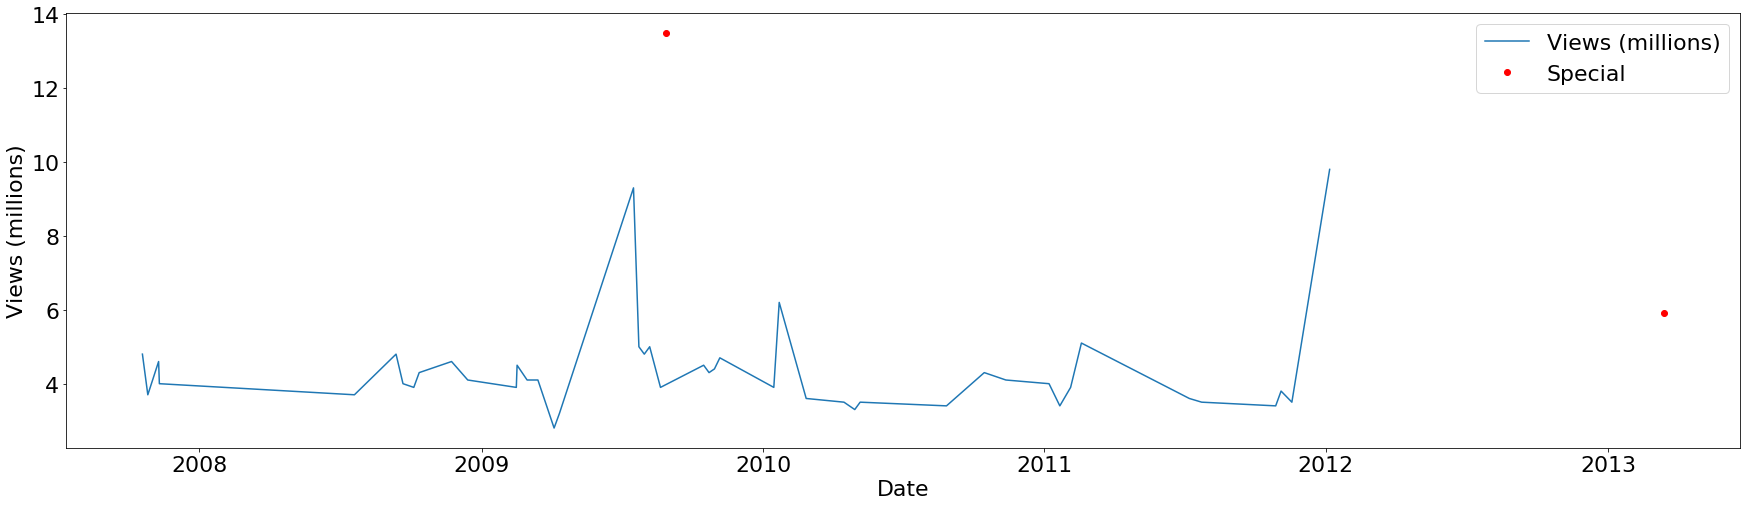

In [84]:
wizards_combined = wizard_combined.dropna()
wizards_combined.reset_index(inplace=True, drop=True)
wizards_plot = wizards_combined.loc[wizards_combined['Special'] == False].plot.line(y='Views (millions)', x='Date', figsize=(30, 8))
wizards_plot.axes.set_xlim(auto=True)
wizards_plot.figure
list_date = wizards_combined.loc[wizards_combined['Special'] == True]['Date'].to_list()
list_views = wizards_combined.loc[wizards_combined['Special'] == True]['Views (millions)'].to_list()
special_legend = wizards_plot.plot(list_date, list_views, 'ro', label='Special')
wizards_plot.legend()
wizards_plot.set_ylabel('Views (millions)')

### *Wizards of Waverly Place* Ratings
The show's special performed poorly in terms of ratings compared to the rest of the show. This disagrees with our hypothesis that specials should be more highly rated.

Text(0, 0.5, 'Rating')

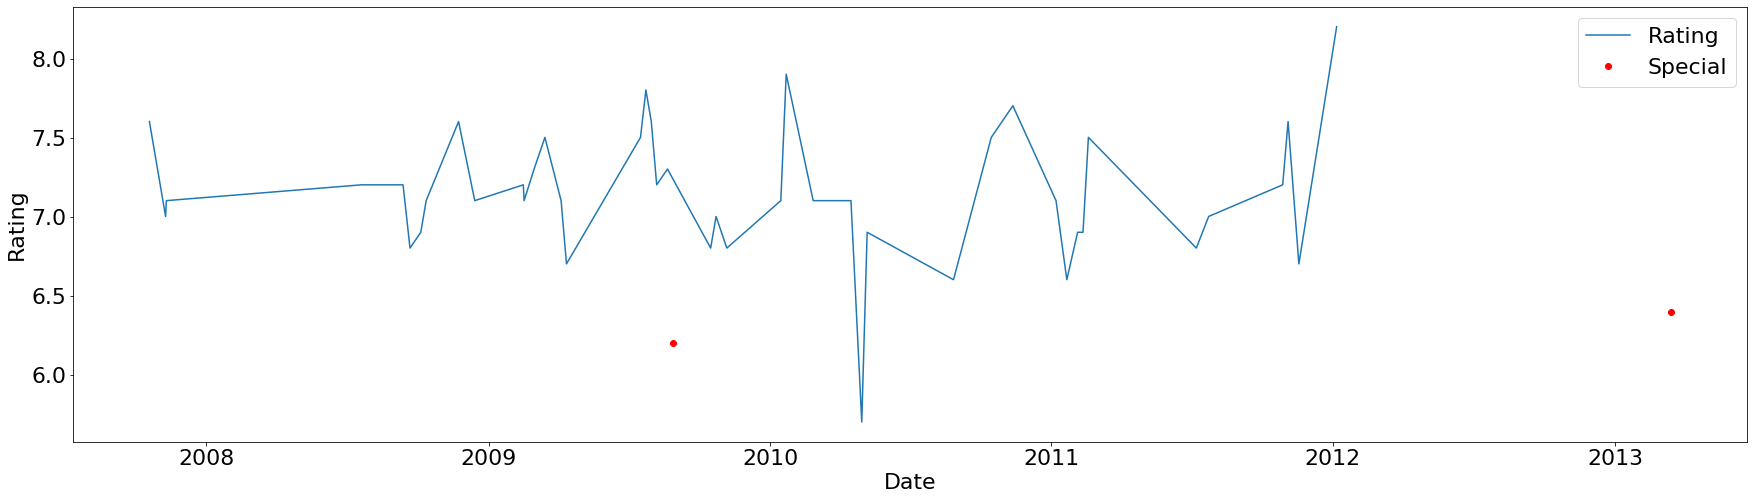

In [85]:
wizards_plot_rating = wizards_combined.loc[wizards_combined['Special'] == False].plot.line(y='Rating', x='Date', figsize=(30, 8))
wizards_plot_rating.axes.set_xlim(auto=True)
wizards_plot_rating.figure
list_date = wizards_combined.loc[wizards_combined['Special'] == True]['Date'].to_list()
list_views = wizards_combined.loc[wizards_combined['Special'] == True]['Rating'].to_list()
special_legend = wizards_plot_rating.plot(list_date, list_views, 'ro', label='Special')
wizards_plot_rating.legend()
wizards_plot_rating.set_ylabel('Rating')

### *Grey's Anatomy* Views
*Grey's Anatomy*'s specials performed poorly viewership-wise compared to the episodes surrounding it. This is most likely due to the nature of the specials being recaps of the previous season, which likely discouraged viewers from tuning in to watch. This disagrees with our hypothesis that specials should have more views.

Text(0, 0.5, 'Views (millions)')

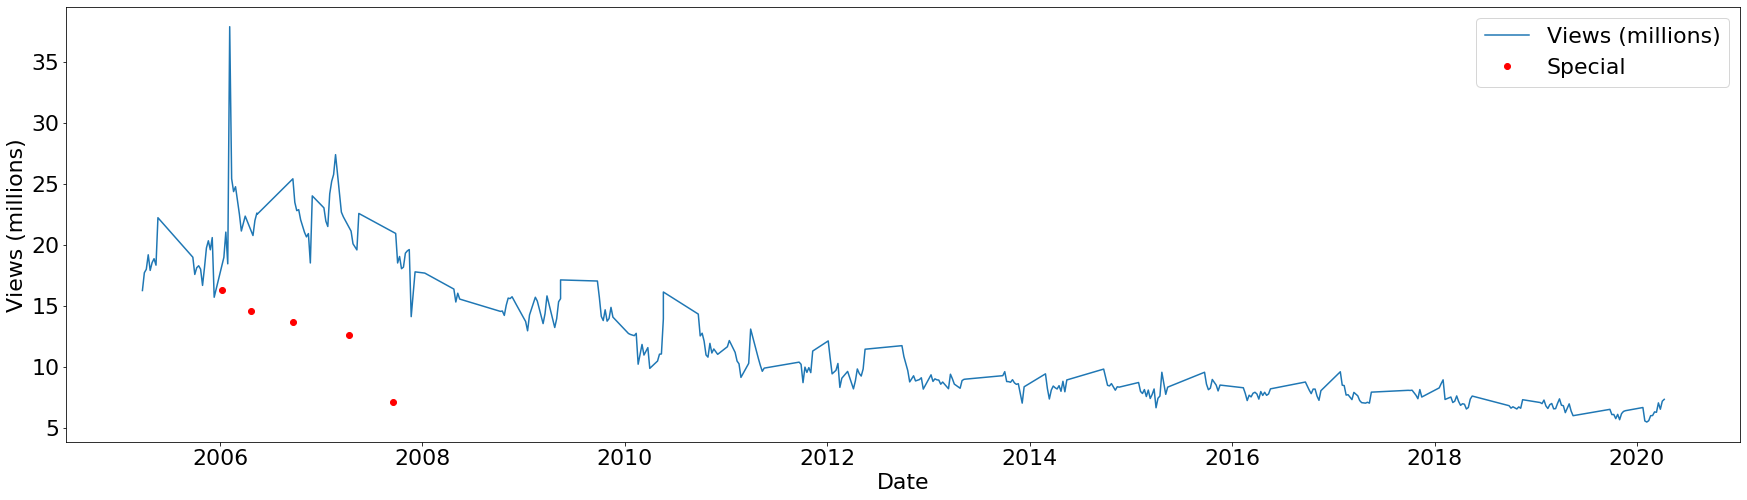

In [86]:
greys_combined = greys_combine.dropna()
greys_combined.reset_index(inplace=True, drop=True)
greys_plot = greys_combined.loc[greys_combined['Special'] == False].plot.line(y='Views (millions)', x='Date', figsize=(30, 8))
greys_plot.axes.set_xlim(auto=True)
greys_plot.figure
list_date = greys_combined.loc[greys_combined['Special'] == True]['Date'].to_list()
list_views = greys_combined.loc[greys_combined['Special'] == True]['Views (millions)'].to_list()
special_legend = greys_plot.plot(list_date, list_views, 'ro', label='Special')
greys_plot.legend()
greys_plot.set_ylabel('Views (millions)')

### *Grey's Anatomy* Ratings
As stated previously, most likely due to the nature of the specials for *Grey's Anatomy*, the specials likely performed worse rating-wise since they are merely recaps. Thus, they performed worse than the regular episodes and our hypothesis was incorrect.

Text(0, 0.5, 'Views (millions)')

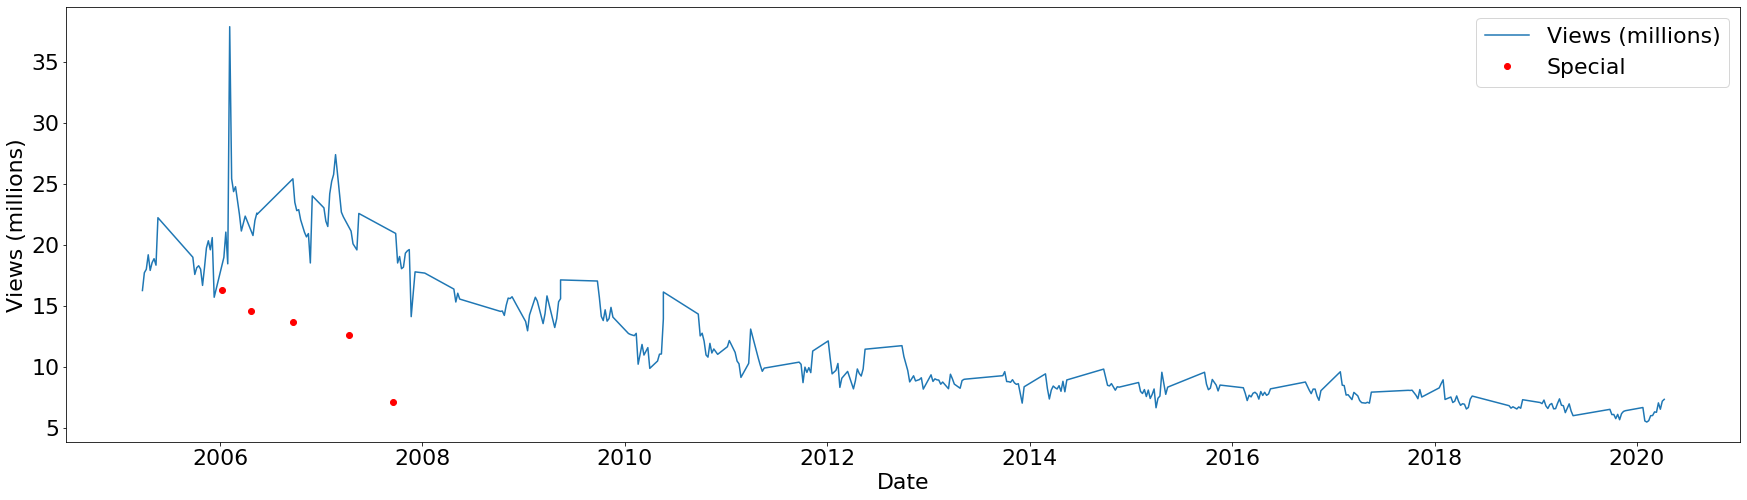

In [87]:
greys_combined = greys_combine.dropna()
greys_combined.reset_index(inplace=True, drop=True)
greys_plot = greys_combined.loc[greys_combined['Special'] == False].plot.line(y='Views (millions)', x='Date', figsize=(30, 8))
greys_plot.axes.set_xlim(auto=True)
greys_plot.figure
list_date = greys_combined.loc[greys_combined['Special'] == True]['Date'].to_list()
list_views = greys_combined.loc[greys_combined['Special'] == True]['Views (millions)'].to_list()
special_legend = greys_plot.plot(list_date, list_views, 'ro', label='Special')
greys_plot.legend()
greys_plot.set_ylabel('Views (millions)')

### *Teen Titans GO* Views
Generally, the specials do about as well as the rest of the show's episodes. There seems to be a downward trend in viewership for all episodes, and the specials follow this trend. The specials were not viewed any more than the regular episodes, which does not support our hypothesis.

Text(0, 0.5, 'Views (millions)')

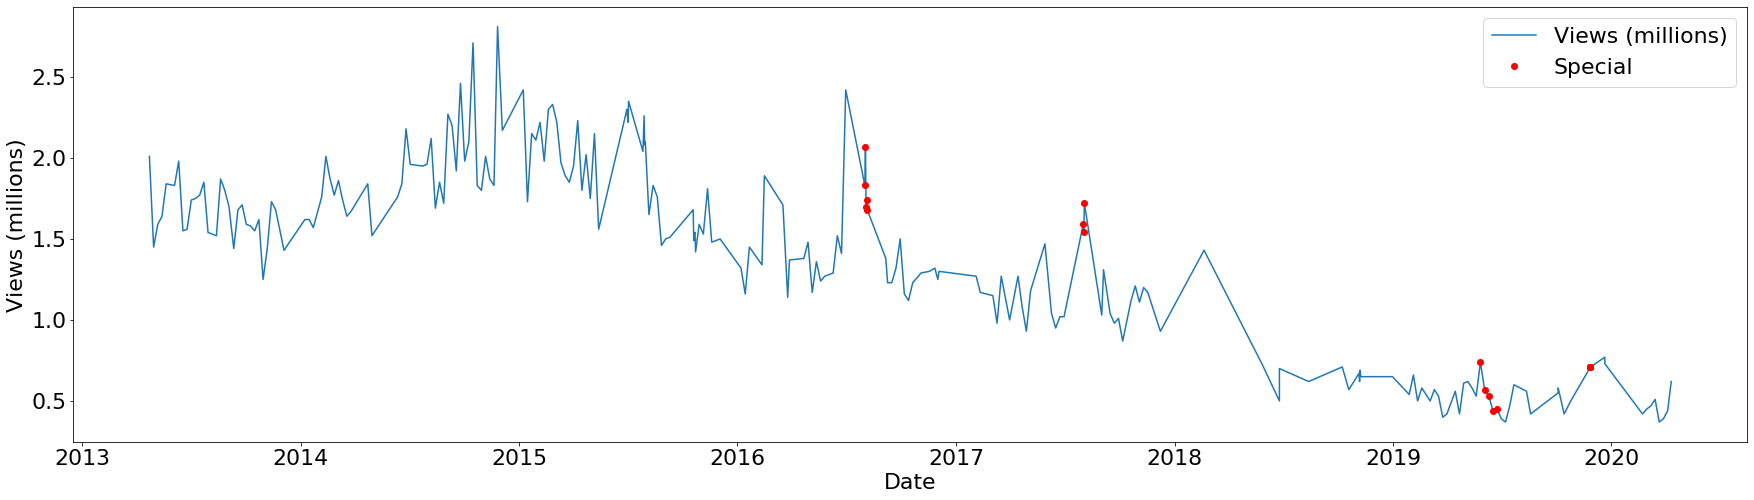

In [88]:
titans_combined = titans_combine.dropna()
titans_combined.reset_index(inplace=True, drop=True)
titans_plot = titans_combined.loc[greys_combined['Special'] == False].plot.line(y='Views (millions)', x='Date', figsize=(30, 8))
titans_plot.axes.set_xlim(auto=True)
titans_plot.figure
list_date = titans_combined.loc[titans_combined['Special'] == True]['Date'].to_list()
list_views = titans_combined.loc[titans_combined['Special'] == True]['Views (millions)'].to_list()
special_legend = titans_plot.plot(list_date, list_views, 'ro', label='Special')
titans_plot.legend()
titans_plot.set_ylabel('Views (millions)')

### *Teen Titans GO* Ratings
**NOTE**: For Teen Titans GO we had less ratings overall so we changed the number of ratings each episode had to receive in order to be included in the dataset.

The first and third cluster of specials had lower ratings than the other episodes it was aired around. However, the other 2 groups of specials performed better than the other episodes. Therefore, we cannot say this proves or disproves our hypothesis that specials have higher ratings.

Text(0, 0.5, 'Rating')

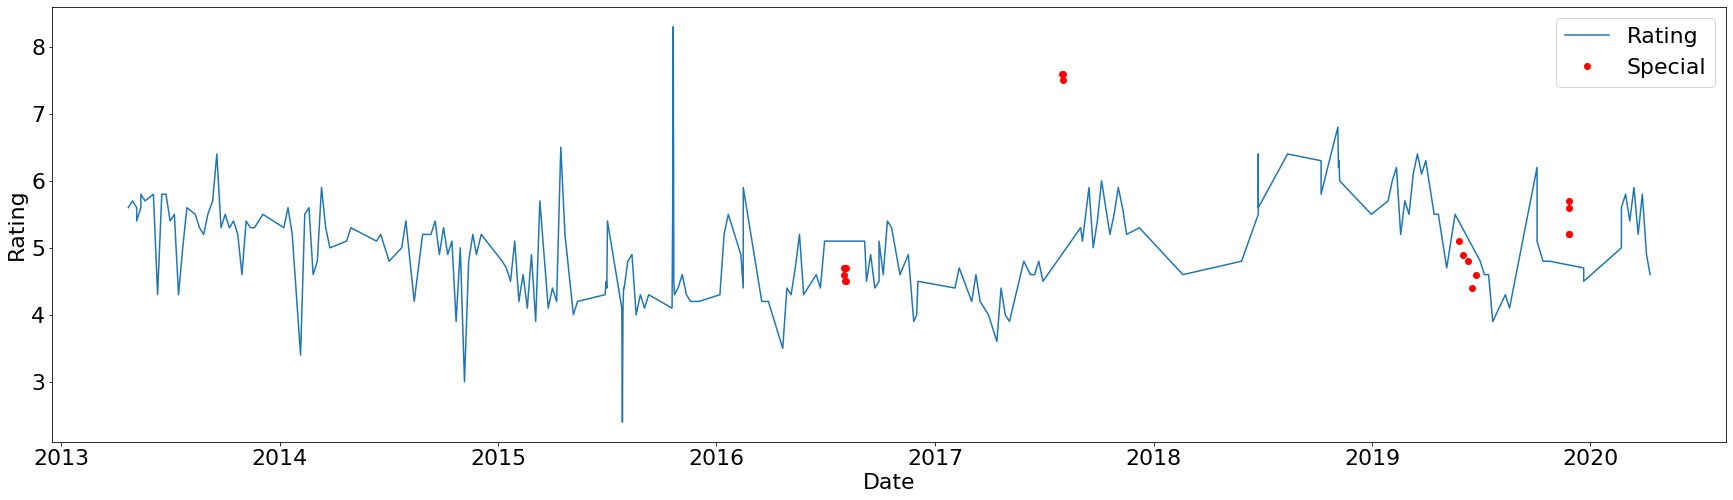

In [89]:
titans_plot_rating = titans_combined.loc[titans_combined['Special'] == False].plot.line(y='Rating', x='Date', figsize=(30, 8))
titans_plot_rating.axes.set_xlim(auto=True)
titans_plot_rating.figure
list_date = titans_combined.loc[titans_combined['Special'] == True]['Date'].to_list()
list_views = titans_combined.loc[titans_combined['Special'] == True]['Rating'].to_list()
special_legend = titans_plot_rating.plot(list_date, list_views, 'ro', label='Special')
titans_plot_rating.legend()
titans_plot_rating.set_ylabel('Rating')

### *The Simpsons* Views
*The Simpsons* has a downward trend in viewership that the specials also follow. The 6 specials tend to underperform compared to episodes aired around the same time. Therefore, this disproves our hypothesis that specials have higher viewership than regular episodes.

Text(0, 0.5, 'Views (millions)')

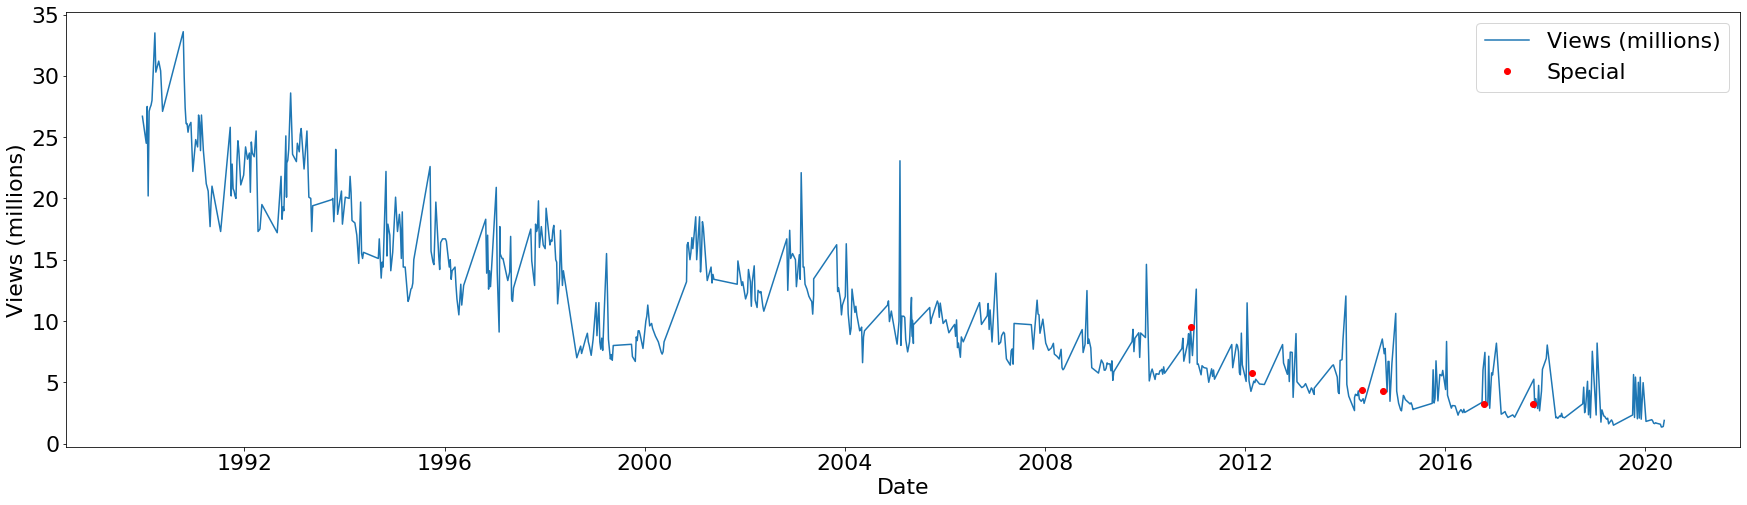

In [90]:
simps_combined = simps_combined.dropna()
simps_combined.reset_index(inplace=True, drop=True)
simps_plot = simps_combined.loc[simps_combined['Special'] == False].plot.line(y='Views (millions)', x='Date', figsize=(30, 8))
simps_plot.axes.set_xlim(auto=True)
simps_plot.figure
list_date = simps_combined.loc[simps_combined['Special'] == True]['Date'].to_list()
list_views = simps_combined.loc[simps_combined['Special'] == True]['Views (millions)'].to_list()
special_legend = simps_plot.plot(list_date, list_views, 'ro', label='Special')
simps_plot.legend()
simps_plot.set_ylabel('Views (millions)')

### *The Simpsons* Ratings
The ratings for the specials tend to perform slightly better than the average rating compared to regular episodes around its airdate. However, it still is mostly average, so we cannot definitively say that it performs better rating-wise. This disproves our hypothesis that specials will have higher ratings than regular episodes.

Text(0, 0.5, 'Rating')

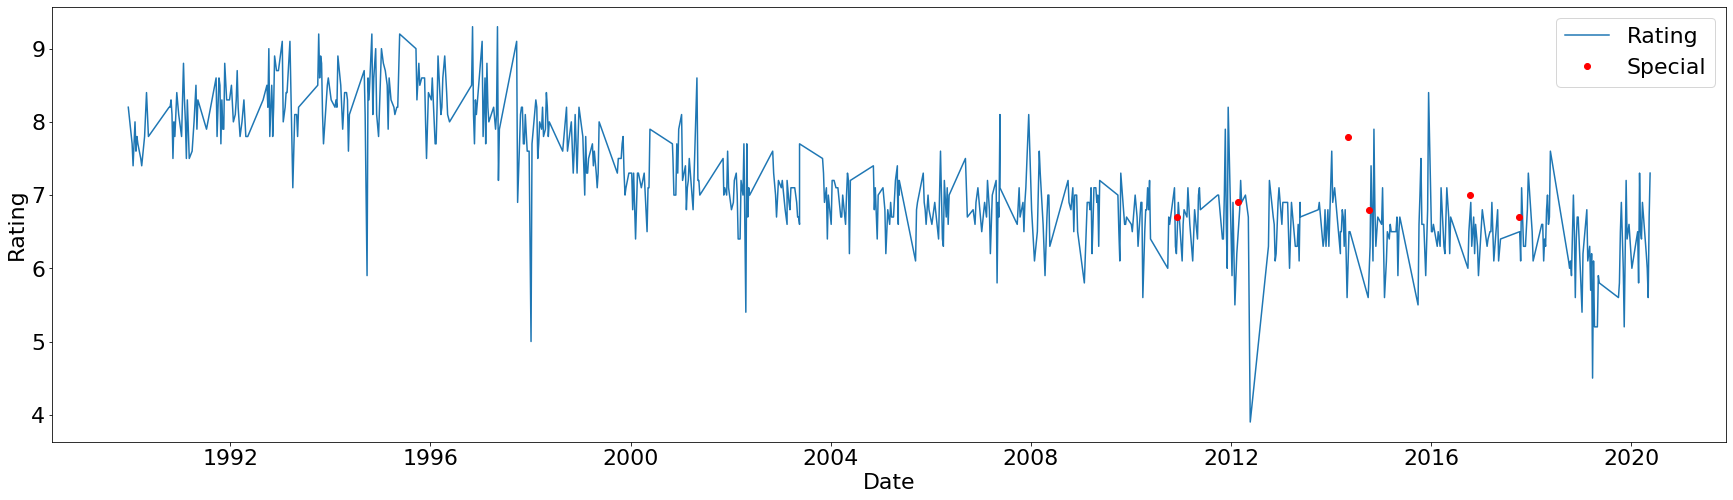

In [91]:
simps_plot_rating = simps_combined.loc[simps_combined['Special'] == False].plot.line(y='Rating', x='Date', figsize=(30, 8))
simps_plot_rating.axes.set_xlim(auto=True)
simps_plot_rating.figure
list_date = simps_combined.loc[simps_combined['Special'] == True]['Date'].to_list()
list_views = simps_combined.loc[simps_combined['Special'] == True]['Rating'].to_list()
special_legend = simps_plot_rating.plot(list_date, list_views, 'ro', label='Special')
simps_plot_rating.legend()
simps_plot_rating.set_ylabel('Rating')

## Analysis

We compared the specials to the episodes surrounding it by comparing the ratings and viewership to the five episodes that aired before it, unless there were fewer than five episodes before it, in which case it took all the episodes before it and enough after it to reach five episodes. We then calculated the ratios of the average viewership and ratings of specials with those episodes surrounding them and averaged them for each show.
We used this approach so that it would be a more accurate representation of whether specials were more popular than if we were to have compared the ratio to the show overall, as a show can vary in popularity throughout its lifetime.

We created a function to calculate the ratios of ratings and views of each special to 5 nearby episodes. Then we appended them to a new dataframe that the function returns.

In [92]:
def compare_surround(db):
    db = db.dropna()
    ratings = []
    views = []
    num_counted = 0
    rating_rat = 0.0
    view_rat = 0.0
    final_db = pd.DataFrame(columns=['Date', 'Title', 'Rating', 'Views (millions)', 'Rating_comp', 'View_comp'])
    for ep, row in db.iterrows():
        if(row['Special'] == True):
            if(num_counted != 5):
                while(num_counted < 5):
                    ratings.append((row + (4-num_counted))['Rating'])
                    views.append((row + (4-num_counted))['Views (millions)'])
                    num_counted += 1
            rating_rat = row['Rating']/(sum(ratings)/num_counted)
            view_rat = row['Views (millions)']/(sum(views)/num_counted)
            final_db = final_db.append({'Date': row['Date'],
                             'Title': row['Title'],
                             'Rating': row['Rating'],
                             'Views (millions)': row['Views (millions)'], 
                             'Rating_comp': rating_rat,
                             'View_comp': view_rat}, ignore_index=True)
        else:
            if(num_counted < 5):
                num_counted += 1
            else:
                ratings.pop(0)
                views.pop(0)
            ratings.append(row['Rating'])
            views.append(row['Views (millions)'])

    return final_db

In [93]:
sponge_comp = compare_surround(sponge_combined)
wizards_comp = compare_surround(wizards_combined)
park_comp = compare_surround(park_combined)
friends_comp = compare_surround(friends_combined)
titans_comp = compare_surround(titans_combined)
greys_comp = compare_surround(greys_combined)
simps_comp = compare_surround(simps_combined)

In this cell we calculated the average of the columns that contain the ratio of ratings and views of the specials compared to its nearby episodes. Then we created a dataframe containing these ratios. If the column value was greater than 1, then on average that show's specials were more popular than its regular episodes.

In [94]:
df_list = [sponge_comp, park_comp, friends_comp, wizards_comp, greys_comp, titans_comp, simps_comp]
df_names = ['Spongebob Squarepants', 'South Park', 'Friends', 'Wizards of Waverly Place', 'Grey\'s Anatomy',
           'Teen Titans Go!', 'The Simpsons']
df_ratios = pd.DataFrame(columns=['Show', 'Special to Regular Rating', 'Special to Regular Views'])
for item, name in zip(df_list, df_names):
    df_ratios = df_ratios.append({'Show': name,
                      'Special to Regular Rating': item['Rating_comp'].mean(),
                      'Special to Regular Views': item['View_comp'].mean()}, ignore_index=True)

In [95]:
df_ratios

,Show,Special to Regular Rating,Special to Regular Views
0,Spongebob Squarepants,1.018257,1.484180
1,South Park,0.992709,0.833310
2,Friends,0.977136,1.012031
3,Wizards of Waverly Place,0.850264,1.819940
4,Grey's Anatomy,0.983881,1.872452
5,Teen Titans Go!,1.092129,1.203272
6,The Simpsons,1.083239,1.091427


## Results

For *Spongebob*, both ratios are greater than 1 signifying that the average of the ratings and views for the specials are greater than the averages for regular episodes. For *South Park*, both ratios are less than 1 which means the average of the ratings and views for the specials are less than the averages for the regular episodes. With *Friends*, the ratio for ratings is less than 1 while the ratio for views is greater than 1. This shows that the average of specials’ ratings is less than the average for regular episodes, and the average of specials’ views is greater than the average for regular episodes. For *Wizards of Waverly Place*, the ratio for ratings is less than 1 while the ratio for views is greater than 1. This means that the average of specials’ ratings is less than the average for regular episodes, and the average of specials’ views is greater than the average for regular episodes. With *Grey’s Anatomy*, the ratio for ratings is less than 1 and the ratio for views is greater than 1. This shows that the average of the specials’ ratings is less than the average for regular episodes, and the average of specials’ views is greater than the average for regular episodes. Both of *Teen Titans Go!*’s ratios are greater than 1 which means that the average of the ratings and views for the specials are greater than the averages for regular episodes. For *The Simpsons* both ratios are also greater than 1, so the average of the ratings and views for the specials are greater than the averages for regular episodes.

## Interpretations

For *Spongebob*, *Teen Titans Go!*, and *The Simpsons*, specials garnered greater ratings and a higher viewership when compared to regular episodes aired near them. For these shows, specials were more popular than regular episodes. For *South Park*, specials did not receive as high of a viewership or rating compared to the surrounding regular episodes. So for *South Park*, specials were less popular than regular episodes. For *Friends*, *Wizards of Waverly Place*, and *Grey’s Anatomy*, specials were able to bring in a greater viewership, but their ratings could not reach those of the regular episodes. For these shows, specials were more popular in terms of viewership but less popular in terms of ratings.
Overall, most shows’ specials are able to bring in a higher viewership but it is less likely that they will receive a higher rating than regular episodes.

# Ethics & Privacy

The data we have found are on public websites. In terms of privacy, we will be looking at numerical ratings and viewership as collected by Wikipedia and IMDb. As such, there should be no concerns with revealing identifiable information.

We decided that the way we are collecting the data is unbiased, as we are using ratings and views of the show's seasons as facts. However, there are possible biases in the actual ratings as the viewers have their own subjective feelings towards shows and what they do or do not like about episodes or specials. Additionally, not all viewers post ratings so our sources do not necessarily represent the entire show’s viewership in the United States, just those who have an online presence and decided to contribute. To combat these biases, we will also measure approximate viewership of each season. Also, our analyses should not be ethically problematic nor have a negative impact on anyone. Instead, our findings could potentially be a helpful start for those in the entertainment industry to decide if they should pursue the making of a special.

# Conclusion & Discussion

Television is a very integral part of society, but historically specials have been an uncertainty. We wanted to know whether this concern is unfounded, specifically if specials are worth producing. This led us to ask the question: Are TV show specials more popular based on viewership and ratings than regular episodes of television shows? In order to answer that, we looked at 7 shows from different genres geared towards different audiences. We gathered viewership data from Wikipedia and the show's ratings from IMDb. Our visualizations from the data we collected conveyed the overall trends of a show's popularity for both ratings and views. To look further, we analyzed the average ratings and views of the specials and the episodes aired prior to them. From these averages, we calculated ratios of the special's ratings and views compared to the regular episodes' values. Most of the shows' specials had a higher ratio of views than they did for ratings. We found that overall, most shows’ specials are able to bring in a higher viewership but it is less likely that they will receive a higher rating than regular episodes. This disproved our hypothesis that specials would be more popular in terms of ratings and viewership.

We relied on the data from Wikipedia and IMDb, as such our analysis is influenced by any missing data they had. Additionally, these shows are not from the same time period, nor do they have the same audience, so the ratings reported reflect that. For example, *Teen Titans GO!* has not been running as long as *Friends* so there's more missing data and we therefore had to adjust for a smaller number of raters. In addition, between IMDb and Wikipedia, many of the shows' episodes had differing titles, so some episodes from our shows could have been dropped in the way we cleaned our data. Another limitation was that the shows had varying number of specials, while we tried to include many shows, our findings may not be entirely generalizable. However, our question could still be important for producers and writers of television shows to understand audiences and increase their show’s popularity. Additionally, with further analysis, this may help answer the question of whether or not specials are truly beneficial to networks and shows. 

# Team Contributions

Kevin: Hypothesis, Data Cleaning, Data Analysis & Results, Research Question, Datasets, Conclusion

Nawwar: Data Cleaning, Data Analysis & Results, Research Question, Datasets, Conclusion

Jane: Ethics, Results, Interpretation, Background, Data Cleaning, Research Question, Datasets, Conclusion

Joey: Data Cleaning, Research Question, Datasets, Conclusion

Anh: Data Cleaning, Research Question, Datasets, Conclusion